# Credit Risk Resampling Techniques

In [125]:
import warnings
warnings.filterwarnings('ignore')

In [126]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

# Read the CSV and Perform Basic Data Cleaning

In [127]:
columns = [
    "loan_amnt", "int_rate", "installment", "home_ownership",
    "annual_inc", "verification_status", "issue_d", "loan_status",
    "pymnt_plan", "dti", "delinq_2yrs", "inq_last_6mths",
    "open_acc", "pub_rec", "revol_bal", "total_acc",
    "initial_list_status", "out_prncp", "out_prncp_inv", "total_pymnt",
    "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee",
    "recoveries", "collection_recovery_fee", "last_pymnt_amnt", "next_pymnt_d",
    "collections_12_mths_ex_med", "policy_code", "application_type", "acc_now_delinq",
    "tot_coll_amt", "tot_cur_bal", "open_acc_6m", "open_act_il",
    "open_il_12m", "open_il_24m", "mths_since_rcnt_il", "total_bal_il",
    "il_util", "open_rv_12m", "open_rv_24m", "max_bal_bc",
    "all_util", "total_rev_hi_lim", "inq_fi", "total_cu_tl",
    "inq_last_12m", "acc_open_past_24mths", "avg_cur_bal", "bc_open_to_buy",
    "bc_util", "chargeoff_within_12_mths", "delinq_amnt", "mo_sin_old_il_acct",
    "mo_sin_old_rev_tl_op", "mo_sin_rcnt_rev_tl_op", "mo_sin_rcnt_tl", "mort_acc",
    "mths_since_recent_bc", "mths_since_recent_inq", "num_accts_ever_120_pd", "num_actv_bc_tl",
    "num_actv_rev_tl", "num_bc_sats", "num_bc_tl", "num_il_tl",
    "num_op_rev_tl", "num_rev_accts", "num_rev_tl_bal_gt_0",
    "num_sats", "num_tl_120dpd_2m", "num_tl_30dpd", "num_tl_90g_dpd_24m",
    "num_tl_op_past_12m", "pct_tl_nvr_dlq", "percent_bc_gt_75", "pub_rec_bankruptcies",
    "tax_liens", "tot_hi_cred_lim", "total_bal_ex_mort", "total_bc_limit",
    "total_il_high_credit_limit", "hardship_flag", "debt_settlement_flag"
]

target = ["loan_status"]

In [128]:
target

['loan_status']

In [129]:
# Load the data
file_path = Path('LoanStats_2019Q1.csv')
file_path

WindowsPath('LoanStats_2019Q1.csv')

In [131]:
df = pd.read_csv(file_path, skiprows=1)[:-2]
df = df.loc[:, columns].copy()

In [132]:
df.head(20)

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,dti,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,20000.0,17.19%,499.10,RENT,47000.0,Source Verified,Mar-2019,Issued,n,14.02,...,98.0,12.5,0.0,0.0,75824.0,31546.0,33800.0,21524.0,N,N
1,21225.0,14.74%,502.05,MORTGAGE,225000.0,Not Verified,Mar-2019,Issued,n,16.80,...,100.0,50.0,1.0,0.0,747075.0,209426.0,53500.0,128175.0,N,N
2,5000.0,17.97%,180.69,MORTGAGE,62000.0,Not Verified,Mar-2019,Issued,n,19.82,...,66.7,50.0,0.0,0.0,255738.0,31615.0,9400.0,39938.0,N,N
3,20000.0,8.19%,628.49,MORTGAGE,200000.0,Not Verified,Mar-2019,Issued,n,22.66,...,95.7,22.2,0.0,0.0,448069.0,84744.0,49400.0,105180.0,N,N
4,12000.0,15.57%,289.09,MORTGAGE,49000.0,Source Verified,Mar-2019,Issued,n,13.47,...,86.1,14.3,0.0,0.0,189260.0,106025.0,24400.0,68860.0,N,N
5,13500.0,7.56%,420.31,RENT,34860.0,Not Verified,Mar-2019,Issued,n,10.91,...,100.0,0.0,0.0,0.0,40200.0,9932.0,25100.0,0.0,N,N
6,25000.0,7.02%,772.16,MORTGAGE,305000.0,Not Verified,Mar-2019,Issued,n,8.16,...,100.0,0.0,0.0,0.0,840287.0,65339.0,81000.0,38858.0,N,N
7,10000.0,12.40%,224.48,MORTGAGE,38000.0,Not Verified,Mar-2019,Issued,n,38.66,...,100.0,50.0,0.0,0.0,176439.0,37523.0,17000.0,57439.0,N,N
8,7000.0,8.81%,221.98,MORTGAGE,50000.0,Verified,Mar-2019,Issued,n,15.75,...,72.7,20.0,0.0,0.0,69211.0,33756.0,26400.0,29211.0,N,N
9,24000.0,12.40%,538.74,MORTGAGE,124812.0,Verified,Mar-2019,Issued,n,20.11,...,98.3,14.3,0.0,0.0,407438.0,91606.0,23300.0,103765.0,N,N


In [133]:
# Load the data
#file_path = Path('LoanStats_2019Q1.csv')
#df = pd.read_csv(file_path, skiprows=1)[:-2]
#df = df.loc[:, columns].copy()

# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')

# Drop the null rows
df = df.dropna()

# Remove the `Issued` loan status
issued_mask = df['loan_status'] != 'Issued'
df = df.loc[issued_mask]

# convert interest rate to numerical
df['int_rate'] = df['int_rate'].str.replace('%', '')
df['int_rate'] = df['int_rate'].astype('float') / 100

# Convert the target column values to low_risk and high_risk based on their values
x = {'Current': 'low_risk'}   
df = df.replace(x)

x = dict.fromkeys(['Late (31-120 days)', 'Late (16-30 days)', 'Default', 'In Grace Period'], 'high_risk')    
df = df.replace(x)

df.reset_index(inplace=True, drop=True)

df.head(20)

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,dti,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,10500.0,0.1719,375.35,RENT,66000.0,Source Verified,Mar-2019,low_risk,n,27.24,...,85.7,100.0,0.0,0.0,65687.0,38199.0,2000.0,61987.0,N,N
1,25000.0,0.2000,929.09,MORTGAGE,105000.0,Verified,Mar-2019,low_risk,n,20.23,...,91.2,50.0,1.0,0.0,271427.0,60641.0,41200.0,49197.0,N,N
2,20000.0,0.2000,529.88,MORTGAGE,56000.0,Verified,Mar-2019,low_risk,n,24.26,...,66.7,50.0,0.0,0.0,60644.0,45684.0,7500.0,43144.0,N,N
3,10000.0,0.1640,353.55,RENT,92000.0,Verified,Mar-2019,low_risk,n,31.44,...,100.0,50.0,1.0,0.0,99506.0,68784.0,19700.0,76506.0,N,N
4,22000.0,0.1474,520.39,MORTGAGE,52000.0,Not Verified,Mar-2019,low_risk,n,18.76,...,100.0,0.0,0.0,0.0,219750.0,25919.0,27600.0,20000.0,N,N
5,25000.0,0.1797,634.43,MORTGAGE,90000.0,Source Verified,Mar-2019,low_risk,n,18.49,...,93.1,66.7,0.0,0.0,550717.0,418934.0,18800.0,369051.0,N,N
6,20400.0,0.2000,540.48,RENT,51315.0,Source Verified,Mar-2019,low_risk,n,25.63,...,100.0,0.0,1.0,0.0,40023.0,23469.0,3500.0,27523.0,N,N
7,10000.0,0.1557,349.46,OWN,66000.0,Source Verified,Mar-2019,low_risk,n,9.00,...,100.0,16.7,0.0,0.0,29300.0,22377.0,8400.0,12500.0,N,N
8,14000.0,0.0881,443.96,RENT,45000.0,Not Verified,Mar-2019,low_risk,n,10.24,...,100.0,0.0,0.0,0.0,25100.0,9724.0,12100.0,3000.0,N,N
9,10000.0,0.1474,345.39,RENT,63295.0,Verified,Mar-2019,low_risk,n,39.34,...,97.2,71.4,0.0,0.0,119822.0,102924.0,15300.0,80722.0,N,N


In [150]:
# convert loan status - target variable to numerical representation
# low_risk = 0 . high_risk = 1
df.loc[df['loan_status']=='low_risk','loan_status'] = 0
df.loc[df['loan_status']=='high_risk','loan_status'] = 1
pd.set_option('display.max_columns', None)
df.head(20)
df

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,next_pymnt_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,10500.0,0.1719,375.35,RENT,66000.0,Source Verified,Mar-2019,0,n,27.24,0.0,0.0,8.0,0.0,1609.0,14.0,w,10204.87,10204.87,355.29,355.29,295.13,60.16,0.0,0.0,0.0,375.35,May-2019,0.0,1.0,Individual,0.0,178.0,38199.0,3.0,4.0,2.0,4.0,3.0,36590.0,59.0,1.0,2.0,1553.0,58.0,3700.0,1.0,0.0,4.0,6.0,4775.0,447.0,77.7,0.0,0.0,93.0,96.0,3.0,3.0,0.0,20.0,1.0,0.0,1.0,2.0,1.0,1.0,10.0,3.0,3.0,2.0,8.0,0.0,0.0,0.0,3.0,85.7,100.0,0.0,0.0,65687.0,38199.0,2000.0,61987.0,N,N
1,25000.0,0.2000,929.09,MORTGAGE,105000.0,Verified,Mar-2019,0,n,20.23,0.0,0.0,17.0,1.0,18368.0,34.0,w,24293.13,24293.13,873.53,873.53,706.87,166.66,0.0,0.0,0.0,929.09,May-2019,0.0,1.0,Individual,0.0,165.0,228119.0,3.0,3.0,2.0,3.0,4.0,42273.0,86.0,4.0,8.0,5197.0,61.0,50400.0,4.0,9.0,3.0,13.0,13419.0,29502.0,28.4,0.0,0.0,87.0,286.0,1.0,1.0,2.0,1.0,11.0,3.0,7.0,11.0,8.0,13.0,14.0,13.0,18.0,11.0,17.0,0.0,0.0,0.0,6.0,91.2,50.0,1.0,0.0,271427.0,60641.0,41200.0,49197.0,N,N
2,20000.0,0.2000,529.88,MORTGAGE,56000.0,Verified,Mar-2019,0,n,24.26,0.0,0.0,8.0,0.0,13247.0,21.0,w,19636.79,19636.79,485.44,485.44,363.21,122.23,0.0,0.0,0.0,529.88,May-2019,0.0,1.0,Individual,0.0,0.0,45684.0,2.0,3.0,2.0,3.0,4.0,32437.0,75.0,2.0,3.0,2810.0,75.0,17500.0,0.0,4.0,1.0,6.0,5711.0,2839.0,62.1,0.0,0.0,159.0,156.0,7.0,4.0,0.0,7.0,7.0,6.0,2.0,5.0,2.0,7.0,8.0,5.0,13.0,5.0,8.0,0.0,0.0,0.0,4.0,66.7,50.0,0.0,0.0,60644.0,45684.0,7500.0,43144.0,N,N
3,10000.0,0.1640,353.55,RENT,92000.0,Verified,Mar-2019,0,n,31.44,0.0,1.0,10.0,1.0,17996.0,23.0,w,9719.34,9719.34,335.33,335.33,280.66,54.67,0.0,0.0,0.0,353.55,May-2019,0.0,1.0,Individual,0.0,0.0,68784.0,0.0,4.0,1.0,3.0,9.0,50788.0,66.0,0.0,1.0,6360.0,69.0,23000.0,3.0,5.0,4.0,4.0,6878.0,4899.0,75.1,0.0,0.0,100.0,89.0,24.0,9.0,0.0,34.0,0.0,0.0,4.0,6.0,4.0,4.0,17.0,6.0,6.0,6.0,10.0,0.0,0.0,0.0,1.0,100.0,50.0,1.0,0.0,99506.0,68784.0,19700.0,76506.0,N,N
4,22000.0,0.1474,520.39,MORTGAGE,52000.0,Not Verified,Mar-2019,0,n,18.76,0.0,1.0,14.0,0.0,9091.0,28.0,w,21614.73,21614.73,484.36,484.36,385.27,99.09,0.0,0.0,0.0,520.39,May-2019,0.0,1.0,Individual,0.0,0.0,177745.0,0.0,1.0,0.0,2.0,14.0,16828.0,84.0,1.0,1.0,3600.0,41.0,43100.0,2.0,0.0,2.0,4.0,13673.0,19699.0,28.6,0.0,0.0,67.0,138.0,11.0,11.0,4.0,11.0,0.0,0.0,4.0,6.0,7.0,11.0,6.0,12.0,18.0,6.0,14.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,219750.0,25919.0,27600.0,20000.0,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68812,10000.0,0.1502,346.76,RENT,26000.0,Source Verified,Jan-2019,0,n,9.60,0.0,0.0,9.0,0.0,2684.0,20.0,

In [149]:
t=pd.get_dummies(df[['home_ownership','verification_status','issue_d', 'pymnt_plan', 'initial_list_status', 'next_pymnt_d', 'application_type', 'hardship_flag', 'debt_settlement_flag']])
t

,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,issue_d_Feb-2019,issue_d_Jan-2019,issue_d_Mar-2019,pymnt_plan_n,initial_list_status_f,initial_list_status_w,next_pymnt_d_Apr-2019,next_pymnt_d_May-2019,application_type_Individual,application_type_Joint App,hardship_flag_N,debt_settlement_flag_N
0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,1,1,0,1,1
1,0,1,0,0,0,0,1,0,0,1,1,0,1,0,1,1,0,1,1
2,0,1,0,0,0,0,1,0,0,1,1,0,1,0,1,1,0,1,1
3,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,1,0,1,1
4,0,1,0,0,1,0,0,0,0,1,1,0,1,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68812,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,1,0,1,1
68813,0,0,0,1,1,0,0,0,1,0,1,0,1,0,1,1,0,1,1
68814,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,1,0,1,1
68815,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,1,0,1,1


In [158]:
# construct X df
# X = pd.concat([df, t])
X = pd.concat([df, t], axis=1, join="outer")
# X = pd.concat([t,pd.DataFrame(df).reindex(t.index)],axis = 1).values
#X_df = df[['home_ownership','verification_status','loan_amnt']]
#X = pd.concat([t,pd.DataFrame(df[['loan_amnt','pct_tl_nvr_dlq']]).reindex(t.index)],axis = 1).values
#y= df['loan_status']
pd.set_option('display.max_columns', None)
X

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,next_pymnt_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,issue_d_Feb-2019,issue_d_Jan-2019,issue_d_Mar-2019,pymnt_plan_n,initial_list_status_f,initial_list_status_w,next_pymnt_d_Apr-2019,next_pymnt_d_May-2019,application_type_Individual,application_type_Joint App,hardship_flag_N,debt_settlement_flag_N
0,10500.0,0.1719,375.35,RENT,66000.0,Source Verified,Mar-2019,0,n,27.24,0.0,0.0,8.0,0.0,1609.0,14.0,w,10204.87,10204.87,355.29,355.29,295.13,60.16,0.0,0.0,0.0,375.35,May-2019,0.0,1.0,Individual,0.0,178.0,38199.0,3.0,4.0,2.0,4.0,3.0,36590.0,59.0,1.0,2.0,1553.0,58.0,3700.0,1.0,0.0,4.0,6.0,4775.0,447.0,77.7,0.0,0.0,93.0,96.0,3.0,3.0,0.0,20.0,1.0,0.0,1.0,2.0,1.0,1.0,10.0,3.0,3.0,2.0,8.0,0.0,0.0,0.0,3.0,85.7,100.0,0.0,0.0,65687.0,38199.0,2000.0,61987.0,N,N,0,0,0,1,0,1,0,0,0,1,1,0,1,0,1,1,0,1,1
1,25000.0,0.2000,929.09,MORTGAGE,105000.0,Verified,Mar-2019,0,n,20.23,0.0,0.0,17.0,1.0,18368.0,34.0,w,24293.13,24293.13,873.53,873.53,706.87,166.66,0.0,0.0,0.0,929.09,May-2019,0.0,1.0,Individual,0.0,165.0,228119.0,3.0,3.0,2.0,3.0,4.0,42273.0,86.0,4.0,8.0,5197.0,61.0,50400.0,4.0,9.0,3.0,13.0,13419.0,29502.0,28.4,0.0,0.0,87.0,286.0,1.0,1.0,2.0,1.0,11.0,3.0,7.0,11.0,8.0,13.0,14.0,13.0,18.0,11.0,17.0,0.0,0.0,0.0,6.0,91.2,50.0,1.0,0.0,271427.0,60641.0,41200.0,49197.0,N,N,0,1,0,0,0,0,1,0,0,1,1,0,1,0,1,1,0,1,1
2,20000.0,0.2000,529.88,MORTGAGE,56000.0,Verified,Mar-2019,0,n,24.26,0.0,0.0,8.0,0.0,13247.0,21.0,w,19636.79,19636.79,485.44,485.44,363.21,122.23,0.0,0.0,0.0,529.88,May-2019,0.0,1.0,Individual,0.0,0.0,45684.0,2.0,3.0,2.0,3.0,4.0,32437.0,75.0,2.0,3.0,2810.0,75.0,17500.0,0.0,4.0,1.0,6.0,5711.0,2839.0,62.1,0.0,0.0,159.0,156.0,7.0,4.0,0.0,7.0,7.0,6.0,2.0,5.0,2.0,7.0,8.0,5.0,13.0,5.0,8.0,0.0,0.0,0.0,4.0,66.7,50.0,0.0,0.0,60644.0,45684.0,7500.0,43144.0,N,N,0,1,0,0,0,0,1,0,0,1,1,0,1,0,1,1,0,1,1
3,10000.0,0.1640,353.55,RENT,92000.0,Verified,Mar-2019,0,n,31.44,0.0,1.0,10.0,1.0,17996.0,23.0,w,9719.34,9719.34,335.33,335.33,280.66,54.67,0.0,0.0,0.0,353.55,May-2019,0.0,1.0,Individual,0.0,0.0,68784.0,0.0,4.0,1.0,3.0,9.0,50788.0,66.0,0.0,1.0,6360.0,69.0,23000.0,3.0,5.0,4.0,4.0,6878.0,4899.0,75.1,0.0,0.0,100.0,89.0,24.0,9.0,0.0,34.0,0.0,0.0,4.0,6.0,4.0,4.0,17.0,6.0,6.0,6.0,10.0,0.0,0.0,0.0,1.0,100.0,50.0,1.0,0.0,99506.0,68784.0,19700.0,76506.0,N,N,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,1,0,1,1
4,22000.0,0.1474,520.39,MORTGAGE,52000.0,Not Verified,Mar-2019,0,n,18.76,0.0,1.0,14.0,0.0,9091.0,28.0,w,21614.73,21614.73,484.36,484.36,385.27,99.09,0.0,0.0,0.0,520.39,May-2019,0.0,1.0,Individual,0.0,0.0,177745.0,0.0,1.0,0.0,2.0,14.0,16828.0,84.0,1.0,1.0,3600.0,41.0,43100.0,2.0,0.0,2.0,4.0,13673.0,19699.0,28.6,0.0,0.0,67.0,138.0,11.0,11.0,4

In [160]:
X.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,issue_d_Feb-2019,issue_d_Jan-2019,issue_d_Mar-2019,pymnt_plan_n,initial_list_status_f,initial_list_status_w,next_pymnt_d_Apr-2019,next_pymnt_d_May-2019,application_type_Individual,application_type_Joint App,hardship_flag_N,debt_settlement_flag_N
count,68817.000000,68817.000000,68817.000000,6.881700e+04,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.0,68817.0,68817.000000,68817.000000,68817.0,68817.0,68817.000000,6.881700e+04,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,6.881700e+04,68817.00000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.0,68817.0,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.0,6.881700e+04,6.881700e+04,68817.000000,6.881700e+04,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.0,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.0,68817.0
mean,16677.594562,0.127718,480.652863,8.821371e+04,21.778153,0.217766,0.497697,12.587340,0.126030,17604.142828,24.666347,16018.845833,16015.919519,970.639473,970.431151,658.748750,311.855687,0.035072,0.0,0.0,517.202218,0.016188,1.0,0.0,188.664298,1.634976e+05,1.023047,3.290481,0.843730,1.909644,14.303152,4.324044e+04,69.21191,1.240042,2.622245,6297.491710,55.702472,42431.895360,1.382071,1.687795,2.189023,4.827572,14142.936193,16991.852667,48.330667,0.006830,2.347065,125.468605,175.136841,14.294215,7.179781,1.441882,24.714954,7.688028,0.472485,3.806123,5.648038,5.135156,7.414403,9.500153,8.630818,13.517663,5.653036,12.571995,0.0,0.0,0.052138,2.219423,95.057627,30.626217,0.125972,0.0,2.100332e+05,6.133843e+04,29734.128558,5.572240e+04,0.009285,0.526309,0.106747,0.357659,0.478007,0.373992,0.148001,0.371696,0.451066,0.177238,1.0,0.123879,0.876121,0.383161,0.616839,0.860340,0.139660,1.0,1.0
std,10277.348590,0.048130,288.062432,1.155800e+05,20.199244,0.718367,0.758122,6.022869,0.336797,21835.880400,12.318917,10002.695495,10004.985940,1229.563301,1229.569864,1126.237377,279.786954,1.086720,0.0,0.0,816.021053,0.134774,0.0,0.0,1808.457195,1.723699e+05,1.176782,2.965579,0.970543,1.544994,13.972619,4.956130e+04,22.33711,1.471745,2.502608,5702.281757,18.495480,37166.229316,1.543220

In [163]:
y=df['loan_status']
y
y.value_counts()

0    68470
1      347
Name: loan_status, dtype: int64

In [164]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
    y, random_state=1, stratify=y)

# Split the Data into Training and Testing

In [71]:
# Create our features
# X = # YOUR CODE HERE

X = pd.get_dummies(df['loan_status'], ['home_ownership'])

# Create our target
# y = # YOUR CODE HERE
#X.iloc[4261]
X

,high_risk,low_risk
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
68812,0,1
68813,0,1
68814,0,1
68815,0,1


In [73]:
X['low_risk']

0        1
1        1
2        1
3        1
4        1
        ..
68812    1
68813    1
68814    1
68815    1
68816    1
Name: low_risk, Length: 68817, dtype: uint8

In [43]:
# Create our target
y = pd.DataFrame(X['loan_status_low_risk'])
y

,loan_status_low_risk
0,1
1,1
2,1
3,1
4,1
...,...
68812,1
68813,1
68814,1
68815,1


In [44]:
X.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,loan_status_low_risk,pymnt_plan_n,initial_list_status_f,initial_list_status_w,next_pymnt_d_Apr-2019,next_pymnt_d_May-2019,application_type_Individual,application_type_Joint App,hardship_flag_N,debt_settlement_flag_N
count,68817.000000,68817.000000,68817.000000,6.881700e+04,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,...,68817.000000,68817.0,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.0,68817.0
mean,16677.594562,0.127718,480.652863,8.821371e+04,21.778153,0.217766,0.497697,12.587340,0.126030,17604.142828,...,0.994958,1.0,0.123879,0.876121,0.383161,0.616839,0.860340,0.139660,1.0,1.0
std,10277.348590,0.048130,288.062432,1.155800e+05,20.199244,0.718367,0.758122,6.022869,0.336797,21835.880400,...,0.070831,0.0,0.329446,0.329446,0.486161,0.486161,0.346637,0.346637,0.0,0.0
min,1000.000000,0.060000,30.890000,4.000000e+01,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0
25%,9000.000000,0.088100,265.730000,5.000000e+04,13.890000,0.000000,0.000000,8.000000,0.000000,6293.000000,...,1.000000,1.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.0,1.0
50%,15000.000000,0.118000,404.560000,7.300000e+04,19.760000,0.000000,0.000000,11.000000,0.000000,12068.000000,...,1.000000,1.0,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.0
75%,24000.000000,0.155700,648.100000,1.040000e+05,26.660000,0.000000,1.000000,16.000000,0.000000,21735.000000,...,1.000000,1.0,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.0,1.0
max,40000.000000,0.308400,1676.230000,8.797500e+06,999.000000,18.000000,5.000000,72.000000,4.000000,587191.000000,...,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0


In [45]:
y.describe()

,loan_status_low_risk
count,68817.000000
mean,0.994958
std,0.070831
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [47]:
# Check the balance of our target values
y['loan_status_low_risk'].value_counts()
#y.value_counts()

1    68470
0      347
Name: loan_status_low_risk, dtype: int64

In [49]:
from sklearn.model_selection import train_test_split
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X,
    y, random_state=1, stratify=y)

In [50]:
X_train

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,loan_status_low_risk,pymnt_plan_n,initial_list_status_f,initial_list_status_w,next_pymnt_d_Apr-2019,next_pymnt_d_May-2019,application_type_Individual,application_type_Joint App,hardship_flag_N,debt_settlement_flag_N
39692,10000.0,0.1131,328.86,49000.0,24.54,0.0,0.0,10.0,1.0,6580.0,...,1,1,0,1,0,1,1,0,1,1
37830,21000.0,0.1072,684.74,57400.0,34.52,0.0,0.0,12.0,0.0,18688.0,...,1,1,0,1,0,1,1,0,1,1
64531,35000.0,0.0881,1109.90,180000.0,3.01,0.0,2.0,7.0,0.0,836.0,...,1,1,0,1,0,1,1,0,1,1
28730,20000.0,0.0819,628.49,80000.0,26.51,0.0,0.0,15.0,0.0,2615.0,...,1,1,0,1,0,1,1,0,1,1
35102,12600.0,0.1356,427.96,71000.0,22.38,1.0,2.0,7.0,0.0,9073.0,...,1,1,0,1,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18872,35000.0,0.0881,1109.90,400000.0,13.79,0.0,1.0,17.0,1.0,7810.0,...,1,1,0,1,1,0,1,0,1,1
6415,16800.0,0.0881,532.76,31000.0,20.48,0.0,0.0,3.0,0.0,1867.0,...,1,1,0,1,0,1,1,0,1,1
12632,25000.0,0.1102,818.71,90000.0,15.27,1.0,0.0,18.0,0.0,26106.0,...,1,1,0,1,1,0,1,0,1,1
24022,14000.0,0.1072,456.49,180000.0,12.35,2.0,0.0,10.0,0.0,3601.0,...,1,1,0,1,0,1,1,0,1,1


In [51]:
X_test

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,loan_status_low_risk,pymnt_plan_n,initial_list_status_f,initial_list_status_w,next_pymnt_d_Apr-2019,next_pymnt_d_May-2019,application_type_Individual,application_type_Joint App,hardship_flag_N,debt_settlement_flag_N
64559,4000.0,0.0702,123.55,7692.0,39.63,0.0,0.0,3.0,0.0,0.0,...,1,1,0,1,0,1,0,1,1,1
4355,19000.0,0.1308,433.09,42500.0,3.50,0.0,0.0,8.0,0.0,856.0,...,1,1,0,1,0,1,0,1,1,1
25635,12000.0,0.1447,282.16,32000.0,23.67,0.0,0.0,11.0,1.0,9364.0,...,1,1,0,1,1,0,1,0,1,1
735,18000.0,0.1308,607.19,36000.0,28.27,0.0,0.0,7.0,0.0,9259.0,...,1,1,0,1,0,1,1,0,1,1
1088,40000.0,0.1240,897.89,275000.0,10.02,1.0,0.0,15.0,0.0,49273.0,...,1,1,0,1,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55734,30000.0,0.0819,611.03,102700.0,17.03,0.0,1.0,20.0,0.0,8825.0,...,1,1,0,1,0,1,1,0,1,1
43156,15000.0,0.0702,463.30,68000.0,13.33,0.0,0.0,23.0,0.0,563.0,...,1,1,0,1,0,1,1,0,1,1
31734,5000.0,0.1447,172.04,13488.0,35.41,1.0,0.0,5.0,0.0,5285.0,...,1,1,0,1,0,1,1,0,1,1
23807,30000.0,0.0819,611.03,80000.0,18.54,0.0,1.0,10.0,0.0,20350.0,...,1,1,1,0,1,0,1,0,1,1


In [52]:
y_train

,loan_status_low_risk
39692,1
37830,1
64531,1
28730,1
35102,1
...,...
18872,1
6415,1
12632,1
24022,1


In [53]:
y_test

,loan_status_low_risk
64559,1
4355,1
25635,1
735,1
1088,1
...,...
55734,1
43156,1
31734,1
23807,1


In [58]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier

LogisticRegression(random_state=1)

In [60]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
   intercept_scaling=1, max_iter=100, multi_class='warn', penalty='12',
   random_state=1, solver='lbfgs', tol=0.0001, warm_start=False)

LogisticRegression(multi_class='warn', penalty='12', random_state=1)

In [61]:
classifier.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [62]:
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
160,0,0
161,0,0
162,0,0
163,0,1


In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9272727272727272

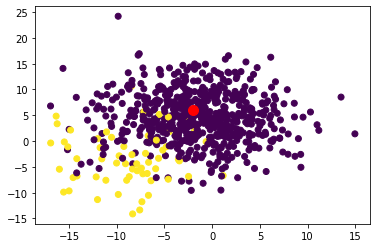

In [64]:
import numpy as np
new_data = np.array([[-2, 6]])
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(new_data[0, 0], new_data[0, 1], c="r", marker="o", s=100)
plt.show()

In [65]:
predictions = classifier.predict(new_data)
print("Classes are either 0 (purple) or 1 (yellow)")
print(f"The new point was classified as: {predictions}")

Classes are either 0 (purple) or 1 (yellow)
The new point was classified as: [0]


In [66]:
from sklearn.metrics import confusion_matrix, classification_report
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

NameError: name 'y_pred' is not defined

# Oversampling

In this section, you will compare two oversampling algorithms to determine which algorithm results in the best performance. You will oversample the data using the naive random oversampling algorithm and the SMOTE algorithm. For each algorithm, be sure to complete the folliowing steps:

1. View the count of the target classes using `Counter` from the collections library. 
3. Use the resampled data to train a logistic regression model.
3. Calculate the balanced accuracy score from sklearn.metrics.
4. Print the confusion matrix from sklearn.metrics.
5. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.

Note: Use a random state of 1 for each sampling algorithm to ensure consistency between tests

### Naive Random Oversampling

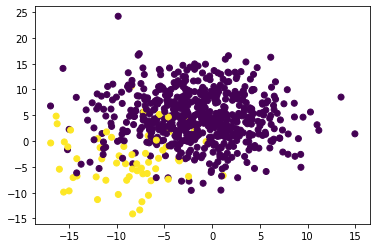

In [54]:
# Resample the training data with the RandomOversampler
# YOUR CODE HERE
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from collections import Counter
X, y = make_blobs(n_samples=[600, 60], random_state=1, cluster_std=5)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()
# Counter({'loan_status': 1})

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
Counter(y_train)

Counter({0: 451, 1: 44})

In [10]:
# Train the Logistic Regression model using the resampled data
# YOUR CODE HERE

LogisticRegression(random_state=1)

In [11]:
# Calculated the balanced accuracy score
# YOUR CODE HERE

0.646602844334948

In [12]:
# Display the confusion matrix
# YOUR CODE HERE
from sklearn.metrics import confusion_matrix, classification_report
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

array([[  75,   26],
       [7686, 9418]])

In [13]:
# Print the imbalanced classification report
# YOUR CODE HERE

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.01      0.74      0.55      0.02      0.64      0.42       101
   low_risk       1.00      0.55      0.74      0.71      0.64      0.40     17104

avg / total       0.99      0.55      0.74      0.71      0.64      0.40     17205



### SMOTE Oversampling

In [14]:
# Resample the training data with SMOTE
# YOUR CODE HERE

Counter({'loan_status': 1})

In [15]:
# Train the Logistic Regression model using the resampled data
# YOUR CODE HERE

LogisticRegression(random_state=1)

In [16]:
# Calculated the balanced accuracy score
# YOUR CODE HERE

0.662394124702461

In [17]:
# Display the confusion matrix
# YOUR CODE HERE

array([[   64,    37],
       [ 5283, 11821]])

In [18]:
# Print the imbalanced classification report
# YOUR CODE HERE

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.01      0.63      0.69      0.02      0.66      0.44       101
   low_risk       1.00      0.69      0.63      0.82      0.66      0.44     17104

avg / total       0.99      0.69      0.63      0.81      0.66      0.44     17205



# Undersampling

In this section, you will test an undersampling algorithms to determine which algorithm results in the best performance compared to the oversampling algorithms above. You will undersample the data using the Cluster Centroids algorithm and complete the folliowing steps:

1. View the count of the target classes using `Counter` from the collections library. 
3. Use the resampled data to train a logistic regression model.
3. Calculate the balanced accuracy score from sklearn.metrics.
4. Print the confusion matrix from sklearn.metrics.
5. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.

Note: Use a random state of 1 for each sampling algorithm to ensure consistency between tests

In [19]:
# Resample the data using the ClusterCentroids resampler
# Warning: This is a large dataset, and this step may take some time to complete
# YOUR CODE HERE

Counter({'loan_status': 1})

In [20]:
# Train the Logistic Regression model using the resampled data
# YOUR CODE HERE

LogisticRegression(random_state=1)

In [21]:
# Calculated the balanced accuracy score
# YOUR CODE HERE

0.5442166848817717

In [22]:
# Display the confusion matrix
# YOUR CODE HERE

array([[   68,    33],
       [10003,  7101]])

In [23]:
# Print the imbalanced classification report
# YOUR CODE HERE

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.01      0.67      0.42      0.01      0.53      0.29       101
   low_risk       1.00      0.42      0.67      0.59      0.53      0.27     17104

avg / total       0.99      0.42      0.67      0.58      0.53      0.27     17205



# Combination (Over and Under) Sampling

In this section, you will test a combination over- and under-sampling algorithm to determine if the algorithm results in the best performance compared to the other sampling algorithms above. You will resample the data using the SMOTEENN algorithm and complete the folliowing steps:

1. View the count of the target classes using `Counter` from the collections library. 
3. Use the resampled data to train a logistic regression model.
3. Calculate the balanced accuracy score from sklearn.metrics.
4. Print the confusion matrix from sklearn.metrics.
5. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.

Note: Use a random state of 1 for each sampling algorithm to ensure consistency between tests

In [24]:
# Resample the training data with SMOTEENN
# Warning: This is a large dataset, and this step may take some time to complete
# YOUR CODE HERE

Counter({'loan_status': 1})

In [25]:
# Train the Logistic Regression model using the resampled data
# YOUR CODE HERE

LogisticRegression(random_state=1)

In [26]:
# Calculated the balanced accuracy score
# YOUR CODE HERE

0.6400726134353378

In [27]:
# Display the confusion matrix
# YOUR CODE HERE

array([[  71,   30],
       [7232, 9872]])

In [28]:
# Print the imbalanced classification report
# YOUR CODE HERE

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.01      0.70      0.58      0.02      0.64      0.41       101
   low_risk       1.00      0.58      0.70      0.73      0.64      0.40     17104

avg / total       0.99      0.58      0.70      0.73      0.64      0.40     17205

